In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('combined_data.pkl')
df

,text,target,embeddings,source,umap_x,umap_y
0,Welcome to /r/depression's check-in post - a p...,1,"[0.005841952748596668, 0.001841536141000688, 0...",real,10.023018,5.271519
1,We understand that most people who reply immed...,1,"[0.01171885896474123, -0.004558514337986708, 0...",real,10.041364,5.275982
2,Anyone else just miss physical touch? I crave ...,1,"[-0.033639535307884216, 0.0027211245615035295,...",real,9.578488,5.643911
3,I’m just so ashamed. Everyone and everything f...,1,"[-0.026109350845217705, -0.004674432799220085,...",real,12.542773,4.242143
4,I really need a friend. I don't even have a si...,1,"[-0.01853109337389469, -0.02057015709578991, -...",real,11.759171,4.501226
...,...,...,...,...,...,...
8089,I'm really worried about my upcoming presentat...,4,"[-0.016573570668697357, -0.009595190174877644,...",synthetic,7.313457,9.853371
8090,I’ve been dealing with this overwhelming sense...,4,"[-0.005343189928680658, 0.008690809831023216, ...",synthetic,7.630939,9.138520
8091,"Lately, I've been experiencing this overwhelmi...",4,"[0.0032356842420995235, -0.0022498848848044872...",synthetic,7.632715,6.387405
8092,"Hi everyone,\n\nLately, I've been feeling real...",4,"[-0.00889642909169197, -0.017824731767177582, ...",synthetic,8.372015,10.579533


In [3]:
real_df = df[df['source'] == 'real']
synthetic_df = df[df['source'] == 'synthetic']

In [4]:
disorders = {
0: 'Stress',
1: 'Depression',
2: 'Bipolar disorder',
3: 'Personality disorder',
4: 'Anxiety'
}

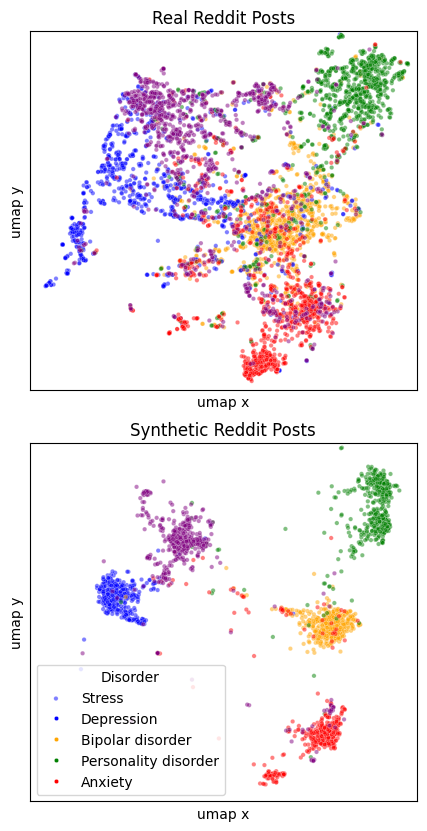

In [7]:
fix, axes = plt.subplots(2, 1, figsize=(5, 10), facecolor='white')
axes[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[0].set_xlabel("umap x")
axes[0].set_ylabel("umap y")
axes[1].set_xlabel("umap x")
axes[1].set_ylabel("umap y")
sns.scatterplot(
    data=real_df, 
    x='umap_x', 
    y='umap_y', 
    ax=axes[0], 
    hue='target', 
    palette={0: "blue", 1: "orange", 2: "green", 3: "red", 4: "purple"},
    alpha=0.5,
    s=10
)
axes[0].set_title("Real Reddit Posts")
axes[0].set(xlim=(3.5, 16), ylim=(1, 14))

sns.scatterplot(
    data=synthetic_df,
    x='umap_x',
    y='umap_y',
    ax=axes[1],
    hue='target',
    palette={0: "blue", 1: "orange", 2: "green", 3: "red", 4: "purple"},
    alpha=0.5,
    s=10
)
axes[1].set_title("Synthetic Reddit Posts")
axes[1].set(xlim=(3.5, 16), ylim=(1, 14))

axes[0].get_legend().remove()  # Remove the legend within axes[0]
handles, labels = axes[1].get_legend_handles_labels()
for handle in handles:
    handle.set_alpha(1)  # Remove transparency from legend points
axes[1].legend(
    title='Disorder',
    loc='lower left',
    labels=[disorders[i] for i in sorted(disorders.keys())]
)

plt.subplots_adjust(hspace=0.15)  # Adjust the vertical space between subplots

# plt.show()
# plt.savefig('reddit_visual.png')
plt.show()
plt.close()

In [6]:
plt.show()